In [1]:
import numpy as np
import h5py

f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
              +"processed/comparison/output/nexus,peaks,OSNK,0,10"
              +",1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE"
              +",FALSE,1/deeplift.imp_score.h5", "r")
#f = h5py.File("/users/avanti/deeplift.imp_score.h5","r")
nanog_mask = np.array(f['metadata']['interval_from_task'][:]=='Nanog')
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])[nanog_mask]
onehot_seq = np.array(f["inputs/seq"][:])[nanog_mask]
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [2]:
import modisco
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)
grp = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/processed/comparison/output/nexus"
                +",peaks,OSNK,0,10,1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE,FALSE,1/deeplift"
                +"/Nanog/out/profile/wn/modisco.h5","r")
loaded_tfmodisco_results =\
    modisco.tfmodisco_workflow.workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
grp.close()
patterns = (loaded_tfmodisco_results
            .metacluster_idx_to_submetacluster_results["metacluster_0"]
            .seqlets_to_patterns_result.patterns)

TF-MoDISco is using the TensorFlow backend.
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/users/avanti/anaconda3/lib/python3

In [3]:
len(loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets)

98300

In [4]:
nanog_profile_wn_contribs.shape

(55233, 1000, 4)

In [5]:
#Saving the seqlets

"""extracted_contrib_scores = []
extracted_hypothetical_scores = []
extracted_onehot_seqs = []
seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets

window_around = 50

#extract +/- 50bp around each seqlet
for seqlet in seqlets_list:
    example_idx = seqlet.coor.example_idx
    start = seqlet.coor.start
    end = seqlet.coor.end
    if ((start>=window_around) and (end<=1000-window_around)):
        extracted_contrib_scores.append(
            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])
        extracted_hypothetical_scores.append(
            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])
        extracted_onehot_seqs.append(
            onehot_seq[example_idx,start-window_around:end+window_around])

np.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))
np.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))
np.save("extracted_onehot.npy", np.array(extracted_onehot_seqs))"""

'extracted_contrib_scores = []\nextracted_hypothetical_scores = []\nextracted_onehot_seqs = []\nseqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets\n\nwindow_around = 50\n\n#extract +/- 50bp around each seqlet\nfor seqlet in seqlets_list:\n    example_idx = seqlet.coor.example_idx\n    start = seqlet.coor.start\n    end = seqlet.coor.end\n    if ((start>=window_around) and (end<=1000-window_around)):\n        extracted_contrib_scores.append(\n            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])\n        extracted_hypothetical_scores.append(\n            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])\n        extracted_onehot_seqs.append(\n            onehot_seq[example_idx,start-window_around:end+window_around])\n\nnp.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))\nnp.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))\nnp.save("

In [6]:
!ls

523a1a82c23711ea9f9157d4c043164e.bin
523a1a82c23711ea9f9157d4c043164e_graph.bin
523a1a82c23711ea9f9157d4c043164e_graph.weights
523a1a82c23711ea9f9157d4c043164e.tree
BpNet-Viz.ipynb
commit0975f52_l6g2m0_results.hdf5
commit20e04f_corrthresh0_nomemeinit_4layerembedding_results.hdf5
commit20e04f_corrthresh0p1_nomemeinit_4layerembedding_results.hdf5
commit20e04f_nomemeinit_4layerembedding_results.hdf5
commit891181_memeinit_l6g2m0_results.hdf5
commit891181_nomemeinit_l6g2m0_results.hdf5
commitb86c5a_l6g2m0_results.hdf5
copy_data.py
copy_model.sh
dcfeda32c23611ea9f9157d4c043164e.bin
deeplift.imp_score.h5
embedding_model.h5
extracted_contrib_scores.npy
extracted_hypothetical_scores.npy
extracted_onehot.npy
gappedkmers_l6g2m0_results.hdf5
LocalNormSeqletIdentification.ipynb
MakeEmbeddingModelAndRunTfModisco_corrthresh-0.1.ipynb
MakeEmbeddingModelAndRunTfModisco.ipynb
meme_out
model.h5
myrun_results.hdf5
presparserun_l8g3m2_results.hdf5
presparserun_results.hdf5
ReplaceSeqletsWithAggregates-Copy

In [7]:
#for i in range(10):
#    seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets
#    modisco.visualization.viz_sequence.plot_weights(seqlets_list[i]["Nanog_profile_wn_contrib_scores"].fwd)

In [8]:
#visualize the saved patterns:
"""%matplotlib inline
from modisco.visualization import viz_sequence
for idx,pattern in enumerate(patterns):
    print("pattern idx",idx)
    print(len(pattern.seqlets))
    viz_sequence.plot_weights(
        pattern["Nanog_profile_wn_contrib_scores"].fwd)
    viz_sequence.plot_weights(pattern["sequence"].fwd)"""

'%matplotlib inline\nfrom modisco.visualization import viz_sequence\nfor idx,pattern in enumerate(patterns):\n    print("pattern idx",idx)\n    print(len(pattern.seqlets))\n    viz_sequence.plot_weights(\n        pattern["Nanog_profile_wn_contrib_scores"].fwd)\n    viz_sequence.plot_weights(pattern["sequence"].fwd)'

/mnt/lab_data2/avanti/tfmodisco
commit 97f7d5b5f110dfbbacf8c8bc327bb082ea518b53 (HEAD -> advanced_gapped_gkmers, origin/advanced_gapped_gkmers)
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Fri Aug 7 03:03:04 2020 -0700

    batched sparse matrix multiplication
/mnt/lab_data2/avanti/tfmodisco_bio_experiments/bpnet/trial1
MEMORY 4.416999424
On task Nanog_profile_wn
Computing windowed sums on original
Generating null dist
peak(mu)= 0.00754788601747714
Computing threshold
Thresholds from null dist were -0.026598811149597168  and  0.2509317398071289
Passing windows frac was 0.04676685078463518 , which is above  0.03 ; adjusting
Final raw thresholds are -0.3184376752376554  and  0.3184376752376554
Final transformed thresholds are -0.9699999852203116  and  0.9699999852203116


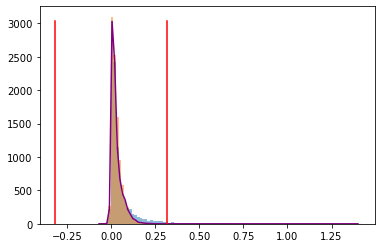

Got 98300 coords
After resolving overlaps, got 98300 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9698999852203116
MEMORY 6.30534144
98300 identified in total
1 activity patterns with support >= 2000 out of 3 possible patterns
Metacluster sizes:  [98297]
Idx to activities:  {0: '1'}
MEMORY 6.3056896
On metacluster 0
Metacluster size 98297 limited to 50000
Relevant tasks:  ('Nanog_profile_wn',)
Relevant signs:  (1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 50000
(Round 1) Computing coarse affmat
MEMORY 6.3056896
Beginning embedding computation


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    9.5s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   15.9s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   26.1s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:   38.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:   51.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:  1.4min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 7180 tasks      | elapsed:  2.8min
[Parallel(n_jobs=10)]: Done 8430 tasks      | elapsed:  3.3min
[Parallel(n_jobs=10)]: Done 9780 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done 11230 tasks      

Constructing csr matrix...
csr matrix made in 155.6576669216156 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 50000 out of 50000 | elapsed: 15.9min finished


Constructing csr matrix...
csr matrix made in 121.98770380020142 s
Finished embedding computation in 4786.81 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 100/100 [49:17<00:00, 29.58s/it]


Batching in slices of size 500


100%|██████████| 100/100 [50:47<00:00, 30.48s/it]


Finished affinity matrix computations in 6198.29 s
(Round 1) Compute nearest neighbors from coarse affmat
MEMORY 50.514993152
Computed nearest neighbors in 225.98 s
MEMORY 50.514993152
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 50.514993152
Launching nearest neighbors affmat calculation job
MEMORY 50.514993152
Parallel runs completed
MEMORY 50.960289792
Job completed in: 357.63 s
MEMORY 70.606106624
Launching nearest neighbors affmat calculation job
MEMORY 70.606241792
Parallel runs completed
MEMORY 70.69128704
Job completed in: 357.19 s
MEMORY 90.33719808
(Round 1) Computed affinity matrix on nearest neighbors in 748.17 s
MEMORY 71.045332992
Filtered down to 37189 of 50000
(Round 1) Retained 37189 rows out of 50000 after filtering
MEMORY 71.04559104
(Round 1) Computing density adapted affmat
MEMORY 42.109763584
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 37189 samples in 2.016s...
[t-SNE] Computed neighbors for 37189 samples in 9.108s...
[t-SNE] Comp

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.758389948473155


  2%|▏         | 1/50 [00:47<38:41, 47.38s/it]

Quality: 0.7589504015834071


 46%|████▌     | 23/50 [20:00<19:36, 43.57s/it]

Quality: 0.7590454195818871


100%|██████████| 50/50 [42:05<00:00, 50.50s/it]


Got 42 clusters after round 1
Counts:
{18: 730, 5: 1973, 7: 1752, 9: 1521, 4: 2100, 16: 960, 3: 2389, 8: 1529, 6: 1819, 13: 1260, 15: 971, 14: 1245, 11: 1342, 10: 1448, 21: 600, 0: 3514, 2: 2762, 1: 3076, 25: 394, 12: 1321, 20: 610, 28: 127, 19: 654, 35: 20, 22: 545, 17: 902, 24: 429, 26: 164, 41: 11, 36: 20, 27: 143, 31: 47, 30: 83, 29: 107, 37: 16, 23: 447, 34: 30, 33: 44, 40: 12, 32: 44, 39: 14, 38: 14}
MEMORY 30.994583552
(Round 1) Aggregating seqlets in each cluster
MEMORY 30.994583552
Aggregating for cluster 0 with 3514 seqlets
MEMORY 30.994583552
Trimmed 86 out of 3514
Removed 1 duplicate seqlets
Aggregating for cluster 1 with 3076 seqlets
MEMORY 30.9943296
Trimmed 101 out of 3076
Aggregating for cluster 2 with 2762 seqlets
MEMORY 30.983585792
Trimmed 97 out of 2762
Aggregating for cluster 3 with 2389 seqlets
MEMORY 30.983585792
Trimmed 60 out of 2389
Removed 14 duplicate seqlets
Aggregating for cluster 4 with 2100 seqlets
MEMORY 30.983585792
Trimmed 152 out of 2100
Aggregating 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   11.4s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   14.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   17.8s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   23.3s
[Parallel(n_jobs=10)]: Done 1370 tasks      | elapsed:   34.5s
[Parallel(n_jobs=10)]: Done 2470 tasks      | elapsed:   51.4s
[Parallel(n_jobs=10)]: Done 3620 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 4370 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 5220 tasks      | elapsed:  1.8min
[Parallel(n_jobs=10)]: Done 6170 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done 7820 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 10120 tasks      | elapsed:  3.0min
[Parallel(n_jobs=10)]: Done 12620 tasks      | elapsed:  3.5min
[Parallel(n_jobs=10)]: Done 15320 tasks      | elapsed:  4.1min
[Parallel(n_jobs=10)]: Done 18220 tasks   

Constructing csr matrix...
csr matrix made in 38.51993441581726 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 34084 out of 34084 | elapsed:  7.6min finished


Constructing csr matrix...
csr matrix made in 37.561806440353394 s
Finished embedding computation in 2124.01 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 69/69 [12:51<00:00, 11.18s/it]


Batching in slices of size 500


100%|██████████| 69/69 [12:43<00:00, 11.07s/it]


Finished affinity matrix computations in 1566.19 s
(Round 2) Compute nearest neighbors from coarse affmat
MEMORY 41.49499904
Computed nearest neighbors in 132.08 s
MEMORY 41.491591168
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 41.491591168
Launching nearest neighbors affmat calculation job
MEMORY 41.491595264
Parallel runs completed
MEMORY 41.486290944
Job completed in: 337.67 s
MEMORY 48.397070336
Launching nearest neighbors affmat calculation job
MEMORY 48.397094912
Parallel runs completed
MEMORY 48.396312576
Job completed in: 339.59 s
MEMORY 55.307116544
(Round 2) Computed affinity matrix on nearest neighbors in 694.13 s
MEMORY 50.779254784
Not applying filtering for rounds above first round
MEMORY 50.779254784
(Round 2) Computing density adapted affmat
MEMORY 41.485500416
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 34084 samples in 1.804s...
[t-SNE] Computed neighbors for 34084 samples in 7.718s...
[t-SNE] Computed conditional probabilities for sa

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.7502160103369117


  2%|▏         | 1/50 [00:47<38:40, 47.35s/it]

Quality: 0.7506905793290725


  6%|▌         | 3/50 [01:54<31:52, 40.69s/it]

Quality: 0.7507822790925263


  8%|▊         | 4/50 [02:26<29:08, 38.00s/it]

Quality: 0.7511288266720242


 30%|███       | 15/50 [10:31<26:38, 45.67s/it]

Quality: 0.7513413623844056


 50%|█████     | 25/50 [17:22<15:09, 36.39s/it]

Quality: 0.7513495306134329


100%|██████████| 50/50 [34:05<00:00, 40.92s/it]


Got 41 clusters after round 2
Counts:
{1: 3162, 0: 3768, 9: 1603, 21: 315, 5: 2349, 13: 986, 7: 1705, 23: 171, 2: 2835, 10: 1600, 18: 347, 8: 1683, 15: 597, 12: 1169, 11: 1343, 14: 799, 4: 2663, 6: 1830, 16: 483, 26: 84, 28: 64, 20: 316, 3: 2682, 31: 40, 19: 344, 22: 207, 17: 375, 24: 97, 27: 83, 25: 91, 30: 57, 32: 39, 35: 19, 29: 57, 34: 26, 37: 16, 40: 8, 33: 28, 36: 17, 39: 12, 38: 14}
MEMORY 32.10786816
(Round 2) Aggregating seqlets in each cluster
MEMORY 32.10786816
Aggregating for cluster 0 with 3768 seqlets
MEMORY 32.10786816
Trimmed 69 out of 3768
Skipped 1 seqlets
Removed 94 duplicate seqlets
Aggregating for cluster 1 with 3162 seqlets
MEMORY 32.107606016
Trimmed 299 out of 3162
Removed 3 duplicate seqlets
Aggregating for cluster 2 with 2835 seqlets
MEMORY 32.107343872
Trimmed 129 out of 2835
Removed 78 duplicate seqlets
Aggregating for cluster 3 with 2682 seqlets
MEMORY 32.107343872
Trimmed 216 out of 2682
Aggregating for cluster 4 with 2663 seqlets
MEMORY 32.104722432
Trimm

Similarity is 0.8783258; is_dissimilar is False
Got 2 subclusters
Inspecting for spurious merging
Wrote graph to binary file in 3.267303705215454 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00721249
Louvain completed 21 runs in 39.289281368255615 seconds
Similarity is 0.8665339; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 2.559126853942871 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0129608
Louvain completed 21 runs in 38.38602089881897 seconds
Similarity is 0.92632663; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 2.861189603805542 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00415928
After 2 runs, maximum modularity is Q = 0.00418033
Louvain completed 22 runs in 42.381242752075195 seconds
Similarity is 0.95196956; is_dissimilar is False
Inspecting for spurious merging
Wr

Louvain completed 21 runs in 35.30805277824402 seconds
Similarity is 0.84389275; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.0077838897705078125 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0156388
Louvain completed 21 runs in 34.41557717323303 seconds
Similarity is 0.8820504; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.010380744934082031 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0169705
Louvain completed 21 runs in 34.82634210586548 seconds
Similarity is 0.9174744; is_dissimilar is False
Merging on 47 clusters
MEMORY 32.104599552
On merging iteration 1
Computing pattern to seqlet distances
Computing pattern to pattern distances
Collapsing 36 & 46 with prob 1.661818795564387e-05 and sim 0.8847278582419885
Collapsing 27 & 43 with prob 0.00013969421909453106 and sim 0.8798940525449516
Collapsing 5 & 11 with prob

In [9]:
#print modisco commit hash
%cd /users/avanti/tfmodisco
!git log -n 1
%cd /users/avanti/tfmodisco_bio_experiments/bpnet/trial1

from importlib import reload

%matplotlib inline
import h5py
import numpy as np
import modisco
import modisco.seqlet_embedding.advanced_gapped_kmer
reload(modisco.seqlet_embedding.advanced_gapped_kmer)
import modisco.seqlet_embedding
reload(modisco.seqlet_embedding)
import modisco
reload(modisco)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.phenograph
reload(modisco.cluster.phenograph)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.cluster
reload(modisco.cluster)
import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.affinitymat.transformers
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.value_provider
reload(modisco.value_provider)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)
import modisco.clusterinit.memeinit
reload(modisco.clusterinit.memeinit)

%matplotlib inline

N_CORES = 10
workflow = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size=21,
    flank_size=10,
    target_seqlet_fdr=0.01,
    min_passing_windows_frac=0.03,
    max_passing_windows_frac=0.03,
    min_metacluster_size=2000,
    min_metacluster_size_frac=0.02,
    max_seqlets_per_metacluster=50000,
    seqlets_to_patterns_factory=
      modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
        #initclusterer_factory=modisco.clusterinit.memeinit.MemeInitClustererFactory(    
        #                meme_command="/software/meme/5.0.1/bin/meme",
        #                base_outdir="meme_out",            
        #                num_seqlets_to_use=10000,
        #                nmotifs=20, n_jobs=4),
        use_louvain=False,
        trim_to_window_size=30,
        initial_flank_to_add=10,
        
        embedder_factory=modisco.seqlet_embedding
                         .advanced_gapped_kmer
                         .AdvancedGappedKmerEmbedderFactory(n_jobs=N_CORES),
        #kmer_len=6,
        #num_gaps=2,
        #num_mismatches=0,        
        n_cores=N_CORES,
        final_min_cluster_size=60
    )
)

results = workflow(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)

In [10]:
import h5py
import modisco.util
reload(modisco.util)
import os

file_path = "commit97f7d5b_agkm_default_results.hdf5"
if (os.path.exists(file_path)):
    os.remove(file_path)
grp = h5py.File(file_path, "w")
results.save_hdf5(grp)
grp.close()

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 6595
Task 0 hypothetical scores:


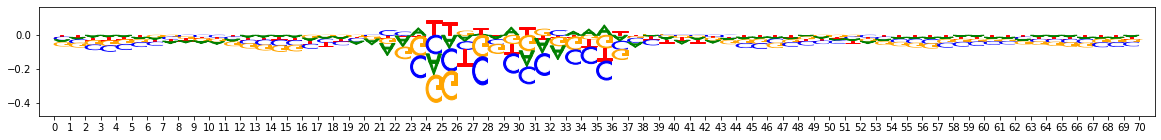

Task 0 actual importance scores:


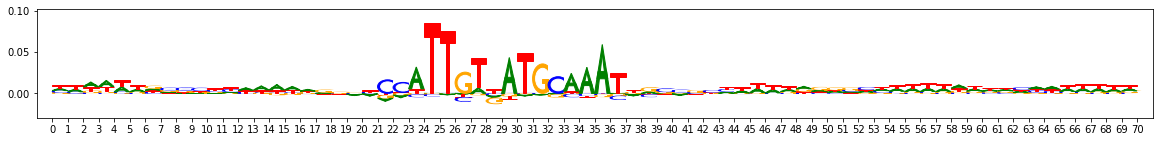

onehot, fwd and rev:


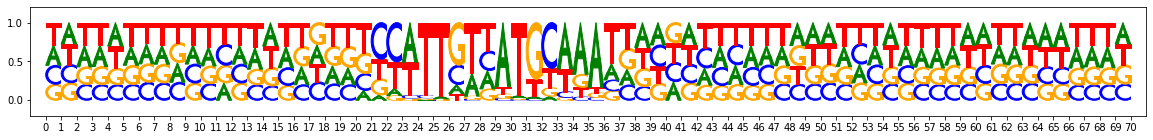

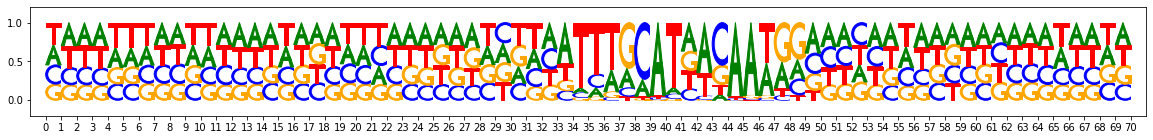

metacluster_0 pattern_1
total seqlets: 3566
Task 0 hypothetical scores:


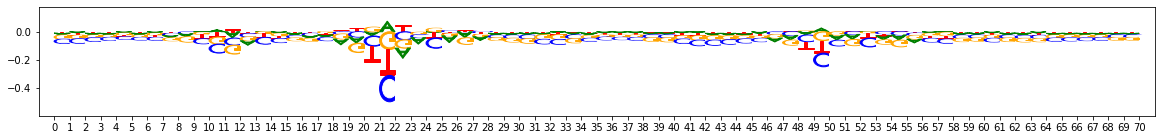

Task 0 actual importance scores:


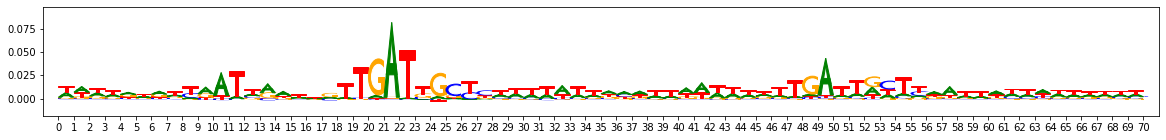

onehot, fwd and rev:


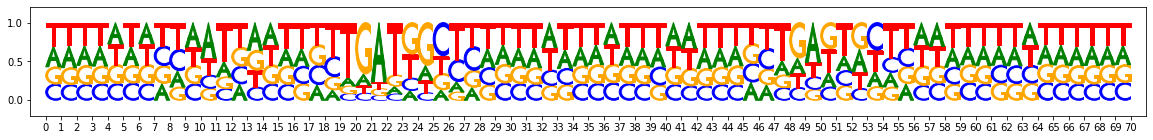

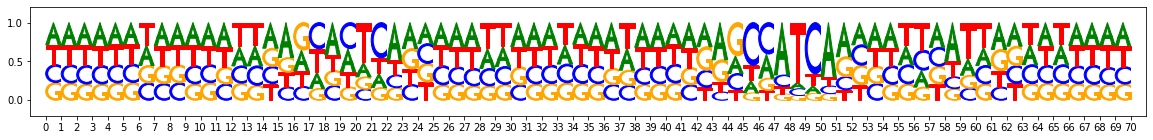

metacluster_0 pattern_2
total seqlets: 2668
Task 0 hypothetical scores:


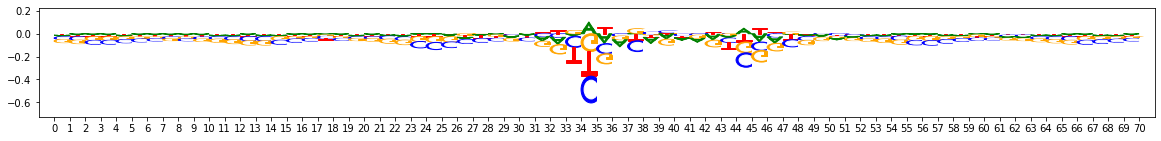

Task 0 actual importance scores:


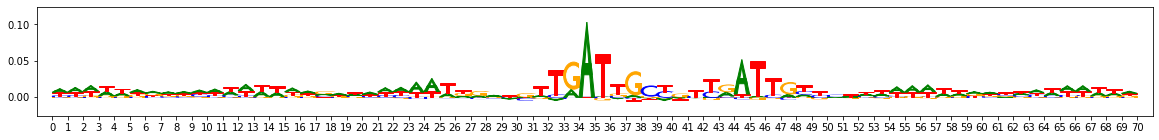

onehot, fwd and rev:


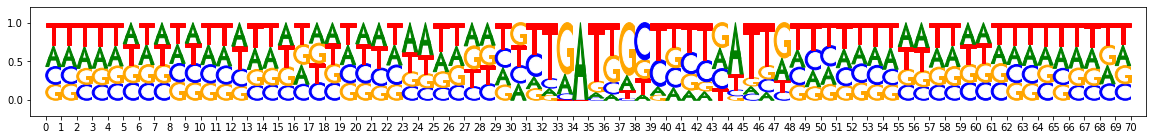

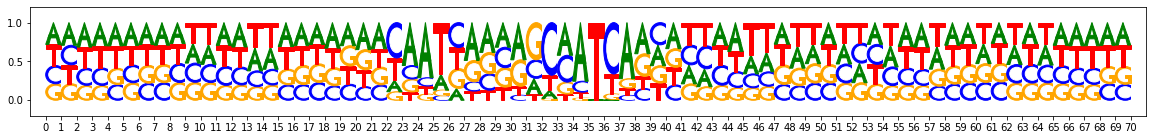

metacluster_0 pattern_3
total seqlets: 2476
Task 0 hypothetical scores:


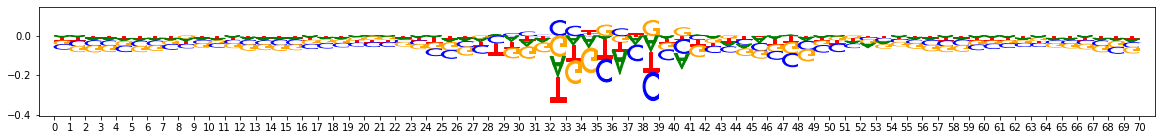

Task 0 actual importance scores:


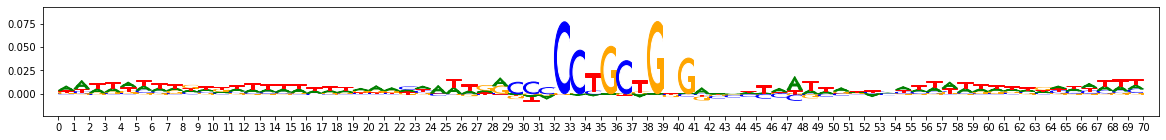

onehot, fwd and rev:


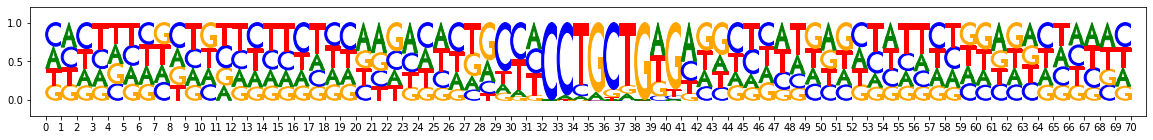

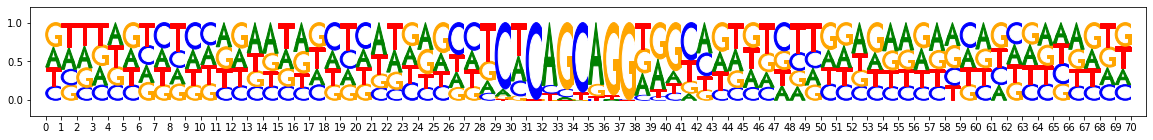

metacluster_0 pattern_4
total seqlets: 2458
Task 0 hypothetical scores:


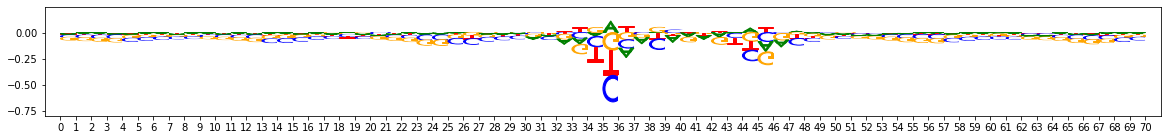

Task 0 actual importance scores:


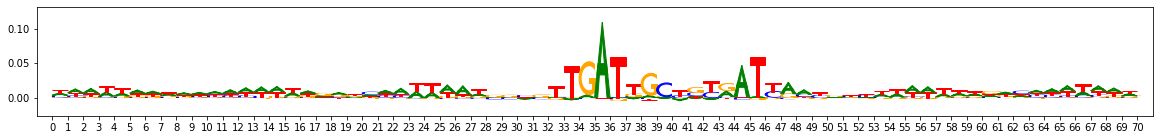

onehot, fwd and rev:


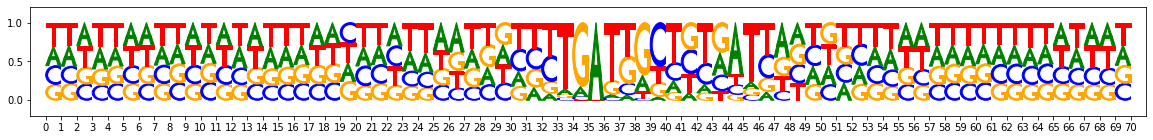

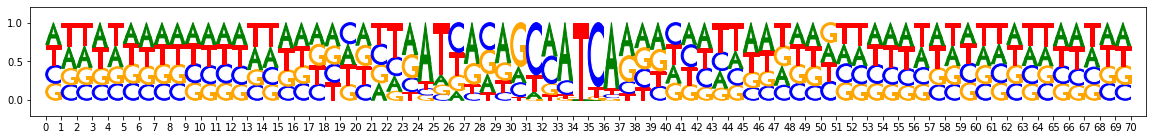

metacluster_0 pattern_5
total seqlets: 1539
Task 0 hypothetical scores:


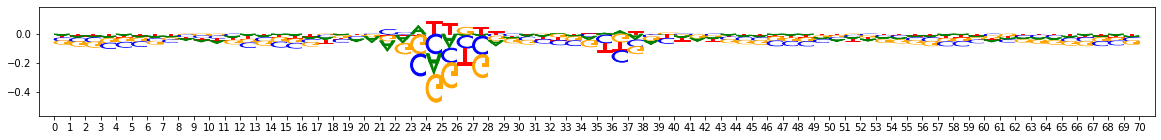

Task 0 actual importance scores:


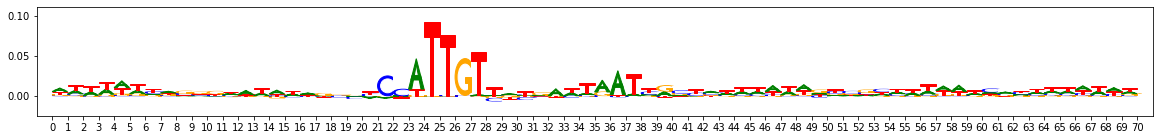

onehot, fwd and rev:


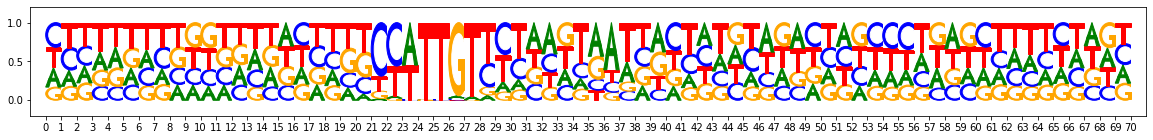

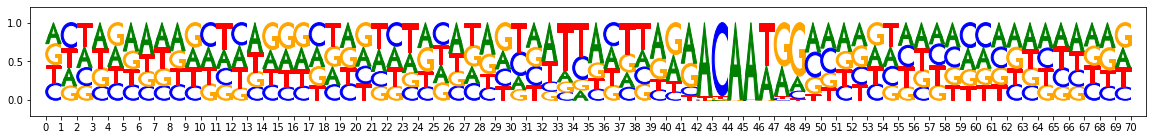

metacluster_0 pattern_6
total seqlets: 1434
Task 0 hypothetical scores:


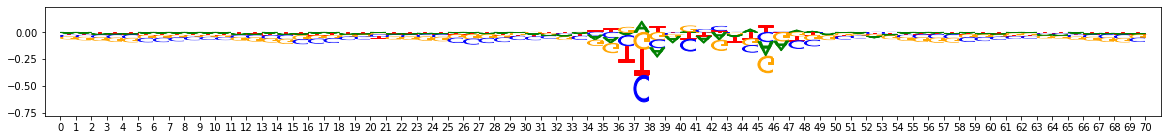

Task 0 actual importance scores:


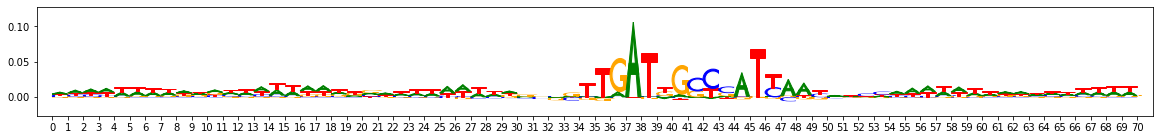

onehot, fwd and rev:


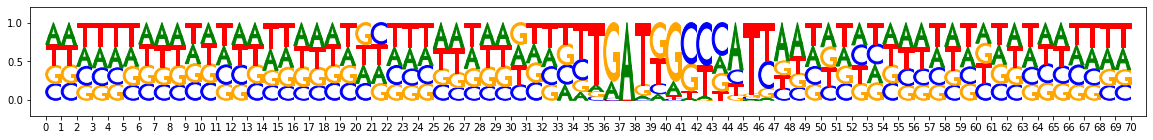

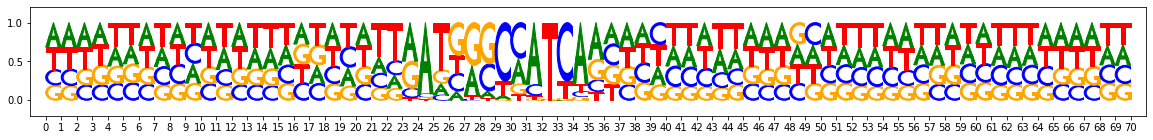

metacluster_0 pattern_7
total seqlets: 1339
Task 0 hypothetical scores:


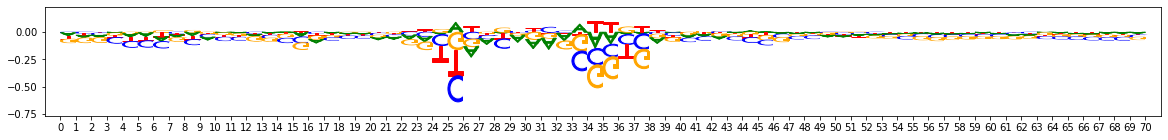

Task 0 actual importance scores:


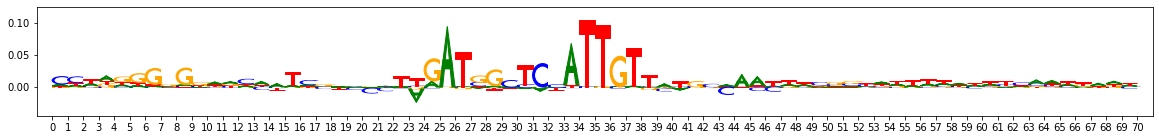

onehot, fwd and rev:


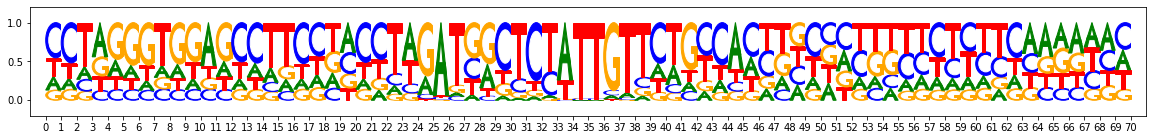

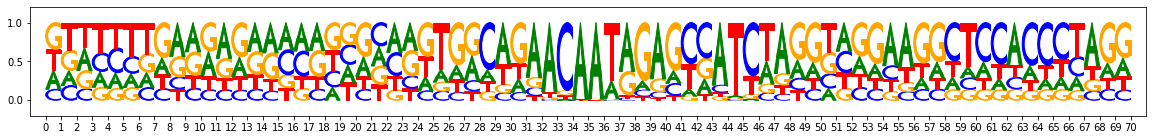

metacluster_0 pattern_8
total seqlets: 1098
Task 0 hypothetical scores:


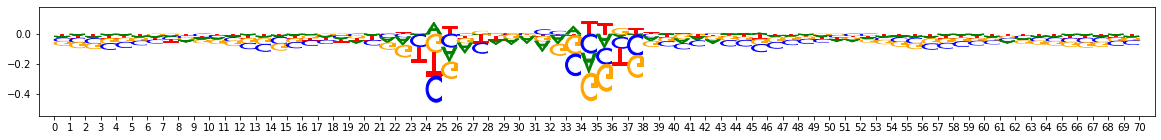

Task 0 actual importance scores:


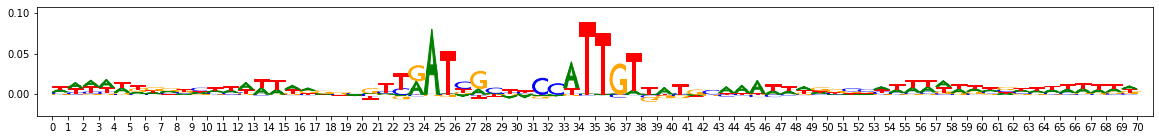

onehot, fwd and rev:


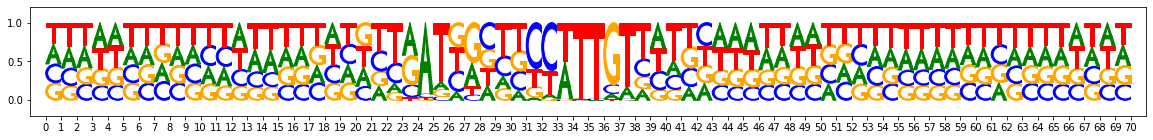

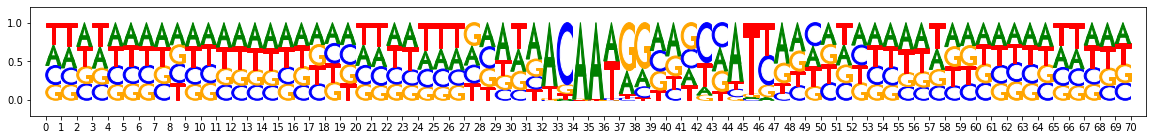

metacluster_0 pattern_9
total seqlets: 1045
Task 0 hypothetical scores:


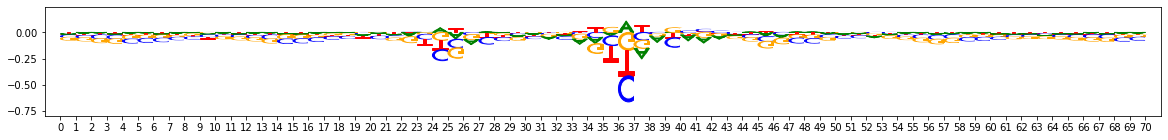

Task 0 actual importance scores:


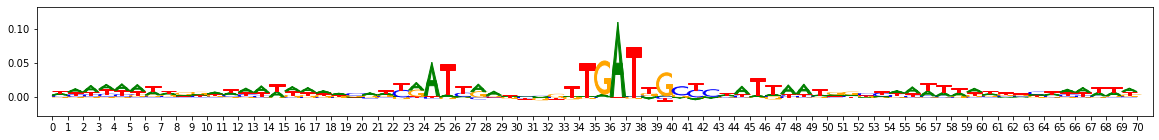

onehot, fwd and rev:


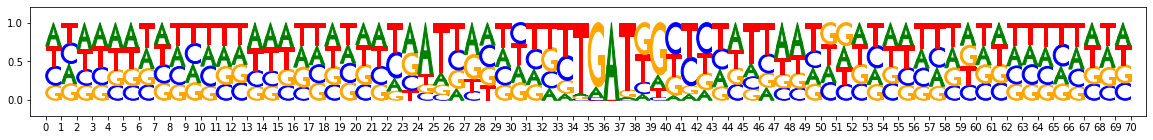

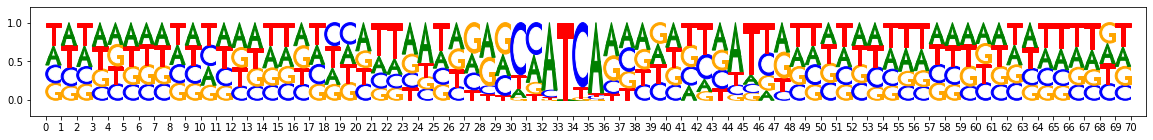

metacluster_0 pattern_10
total seqlets: 952
Task 0 hypothetical scores:


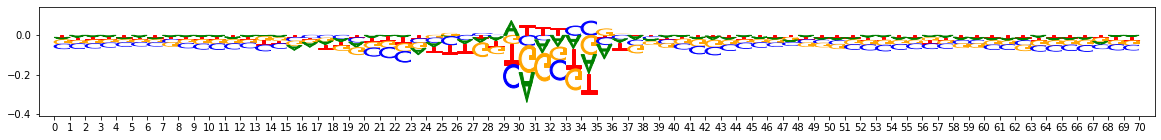

Task 0 actual importance scores:


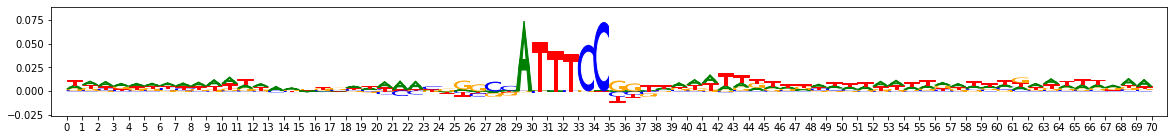

onehot, fwd and rev:


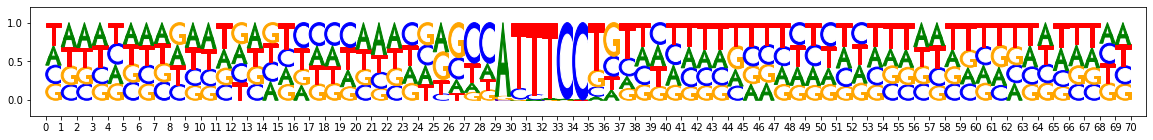

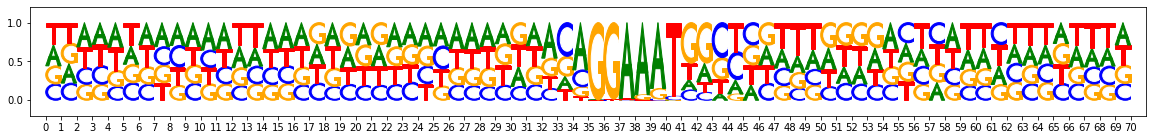

metacluster_0 pattern_11
total seqlets: 801
Task 0 hypothetical scores:


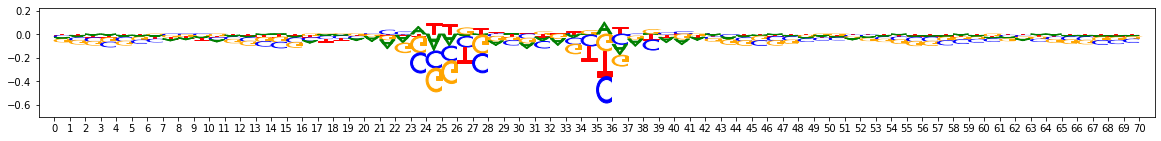

Task 0 actual importance scores:


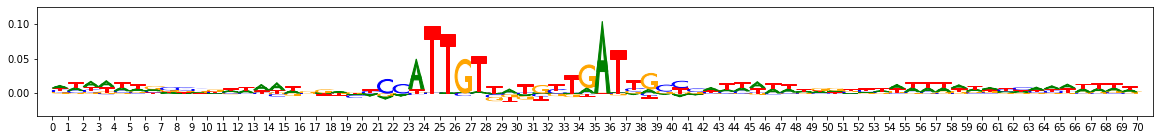

onehot, fwd and rev:


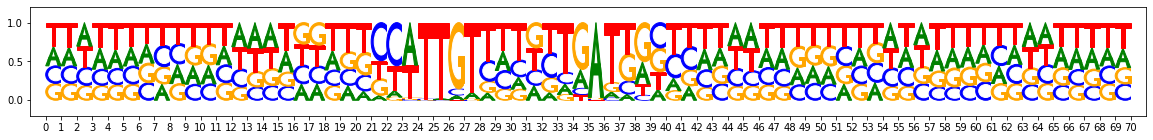

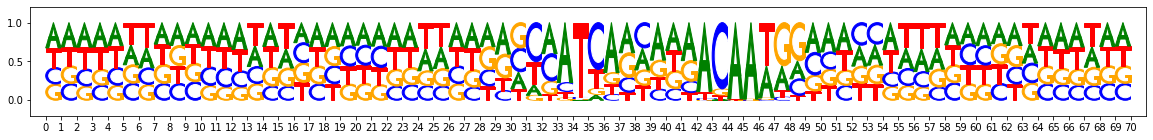

metacluster_0 pattern_12
total seqlets: 719
Task 0 hypothetical scores:


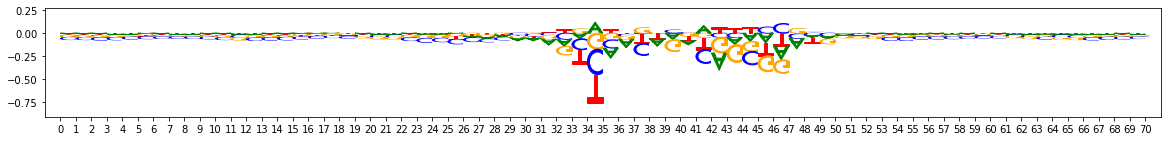

Task 0 actual importance scores:


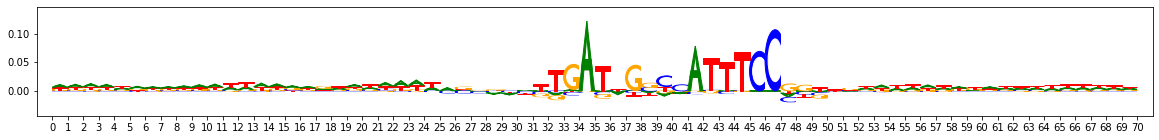

onehot, fwd and rev:


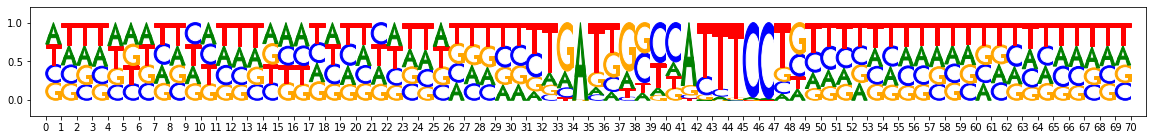

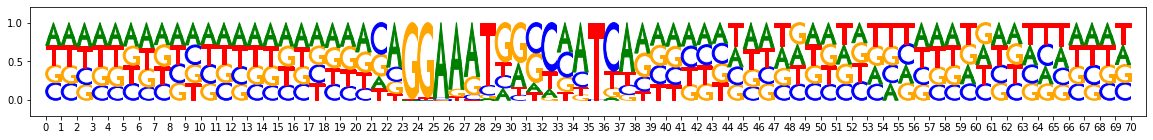

metacluster_0 pattern_13
total seqlets: 662
Task 0 hypothetical scores:


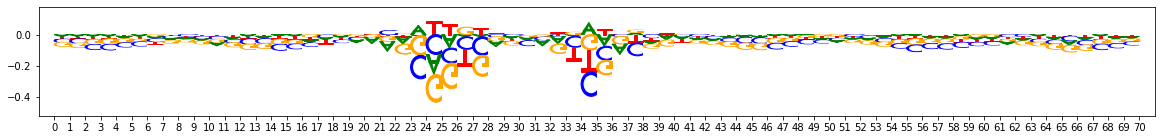

Task 0 actual importance scores:


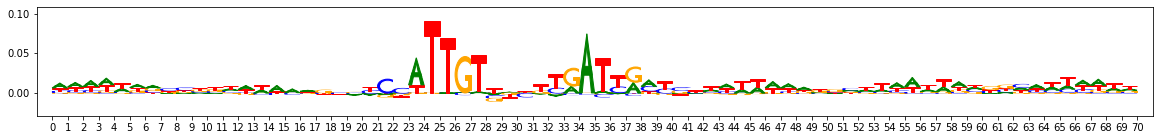

onehot, fwd and rev:


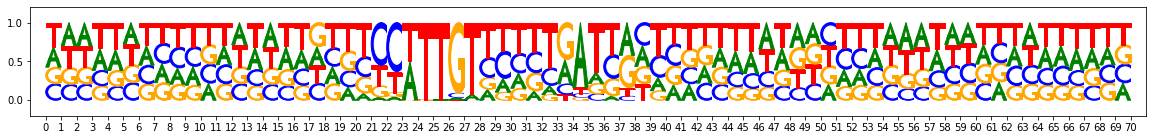

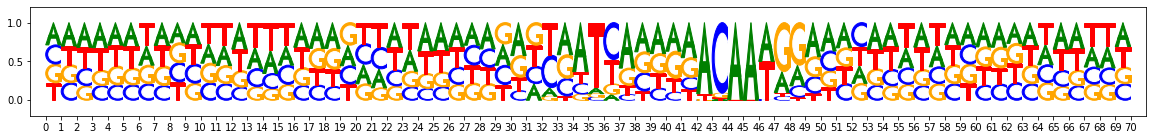

metacluster_0 pattern_14
total seqlets: 481
Task 0 hypothetical scores:


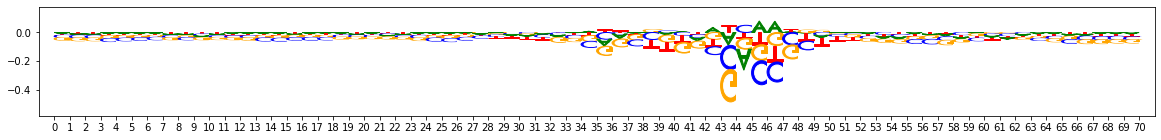

Task 0 actual importance scores:


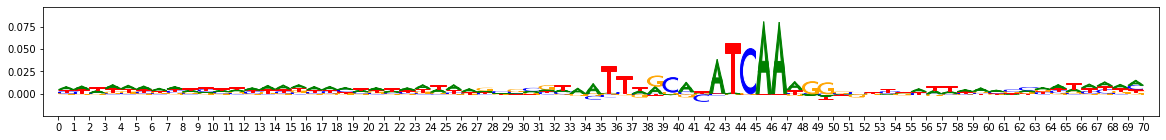

onehot, fwd and rev:


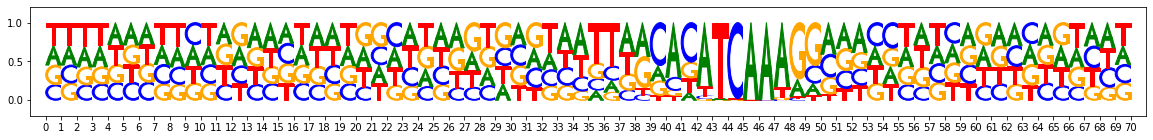

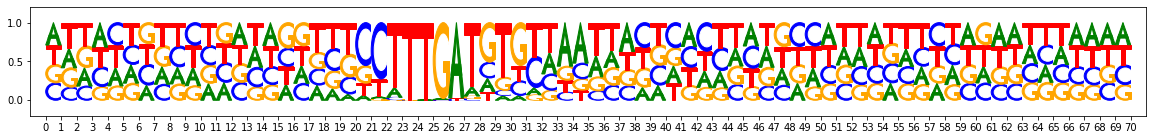

metacluster_0 pattern_15
total seqlets: 310
Task 0 hypothetical scores:


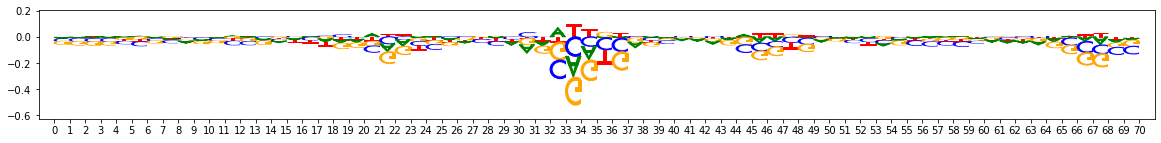

Task 0 actual importance scores:


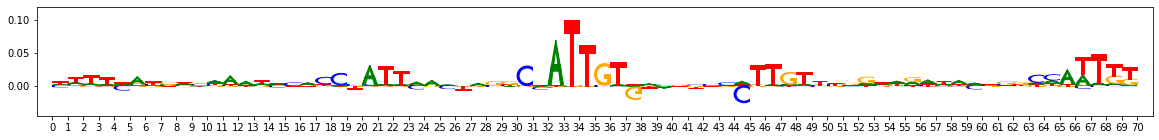

onehot, fwd and rev:


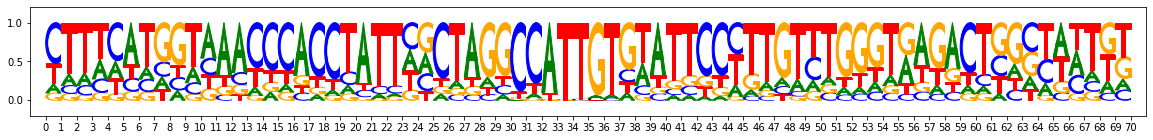

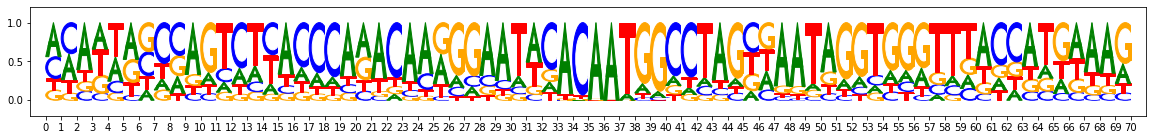

metacluster_0 pattern_16
total seqlets: 285
Task 0 hypothetical scores:


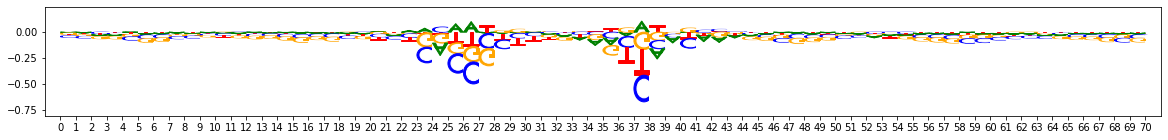

Task 0 actual importance scores:


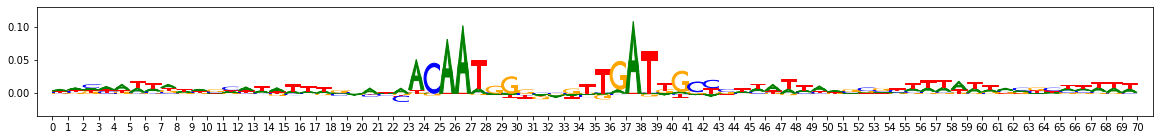

onehot, fwd and rev:


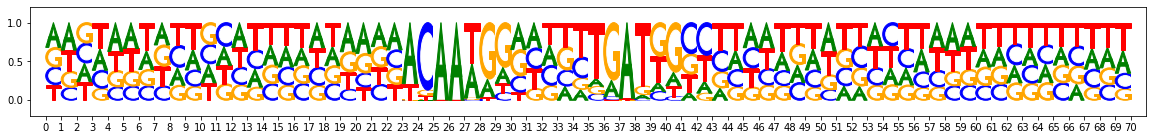

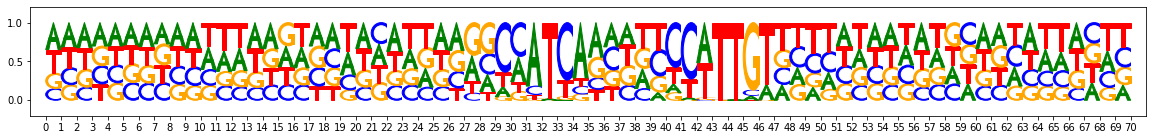

metacluster_0 pattern_17
total seqlets: 233
Task 0 hypothetical scores:


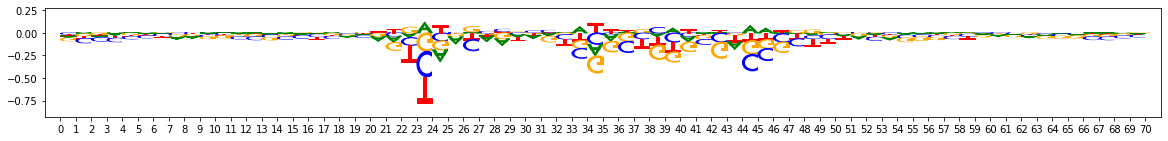

Task 0 actual importance scores:


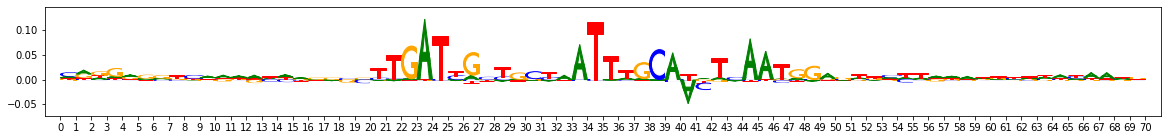

onehot, fwd and rev:


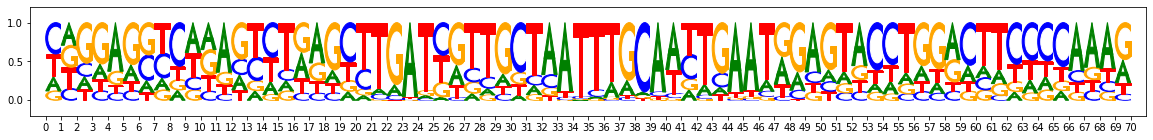

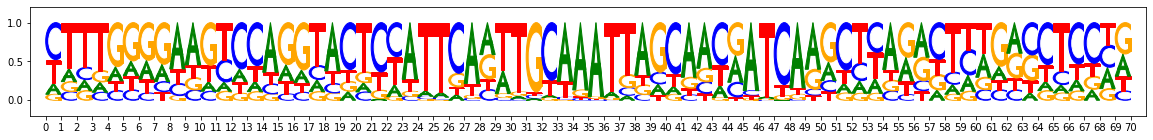

metacluster_0 pattern_18
total seqlets: 186
Task 0 hypothetical scores:


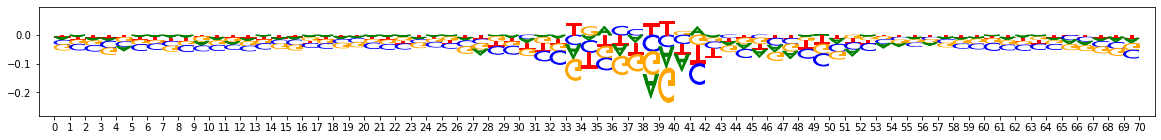

Task 0 actual importance scores:


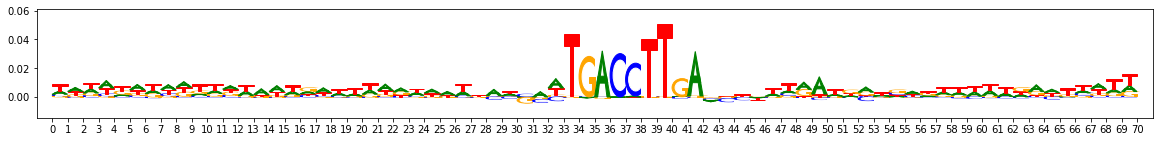

onehot, fwd and rev:


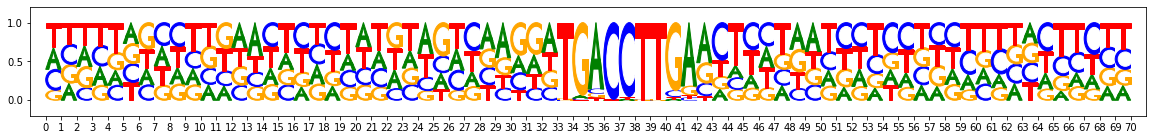

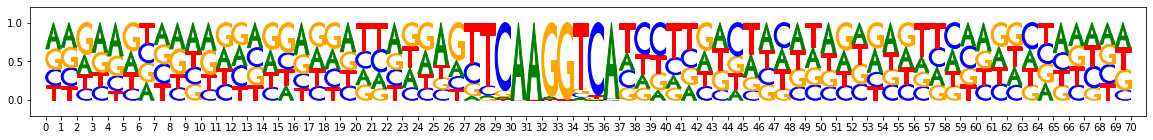

metacluster_0 pattern_19
total seqlets: 218
Task 0 hypothetical scores:


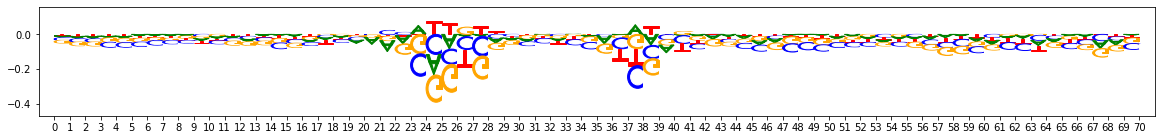

Task 0 actual importance scores:


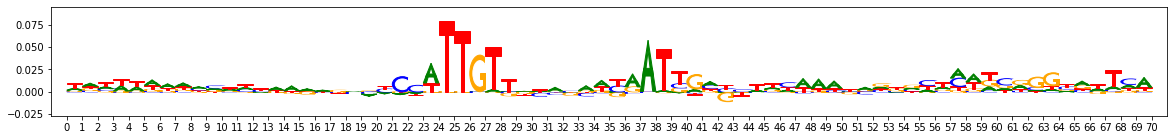

onehot, fwd and rev:


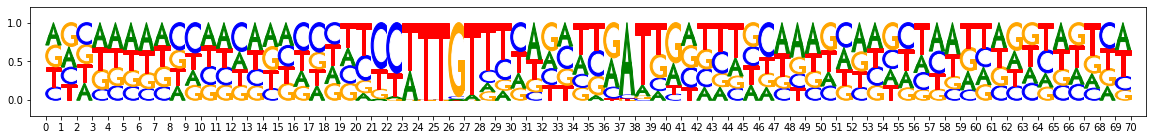

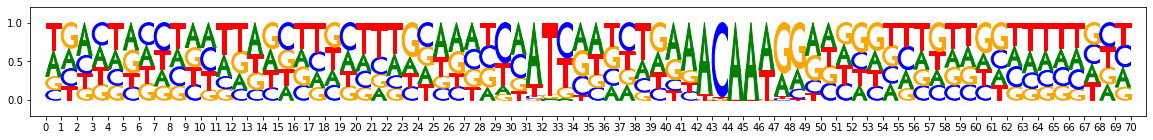

metacluster_0 pattern_20
total seqlets: 117
Task 0 hypothetical scores:


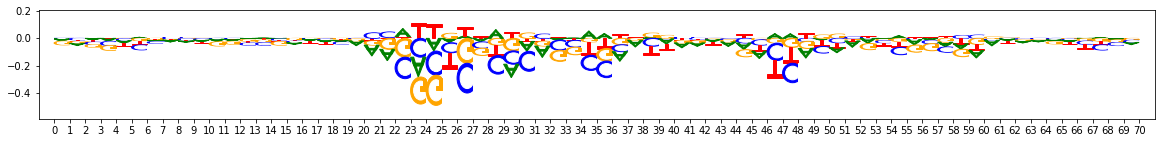

Task 0 actual importance scores:


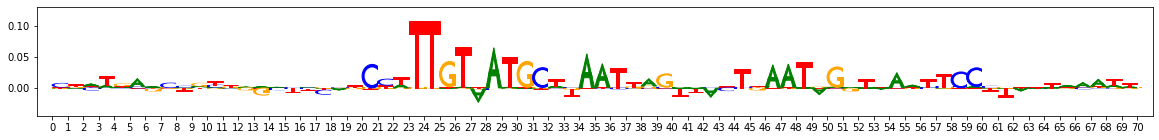

onehot, fwd and rev:


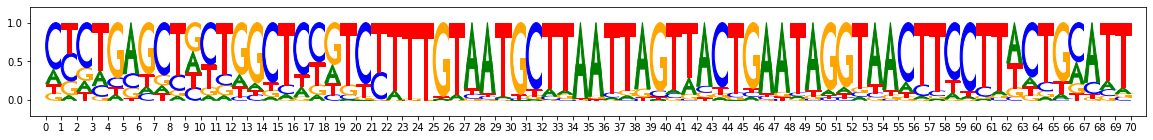

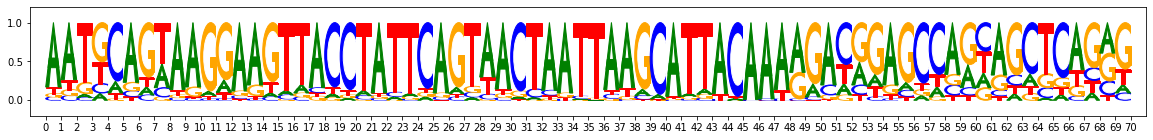

metacluster_0 pattern_21
total seqlets: 112
Task 0 hypothetical scores:


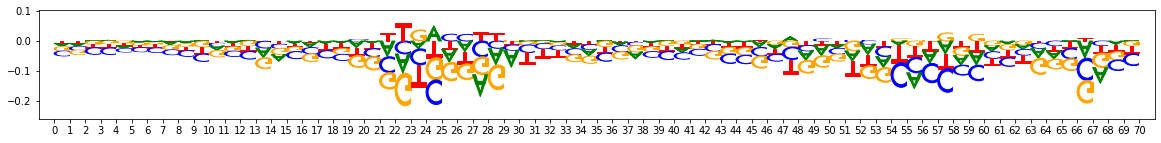

Task 0 actual importance scores:


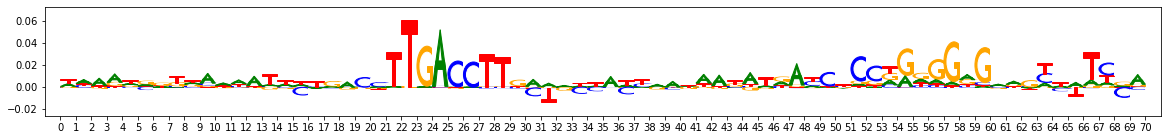

onehot, fwd and rev:


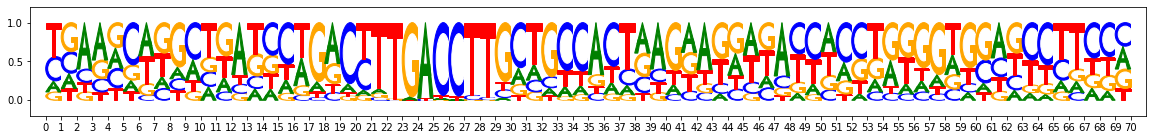

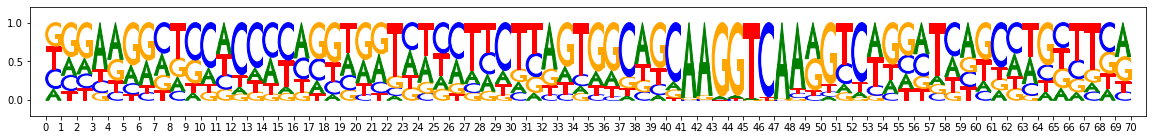

metacluster_0 pattern_22
total seqlets: 122
Task 0 hypothetical scores:


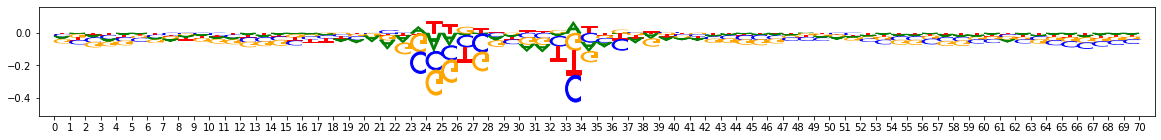

Task 0 actual importance scores:


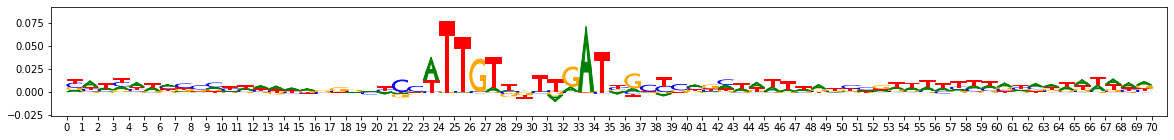

onehot, fwd and rev:


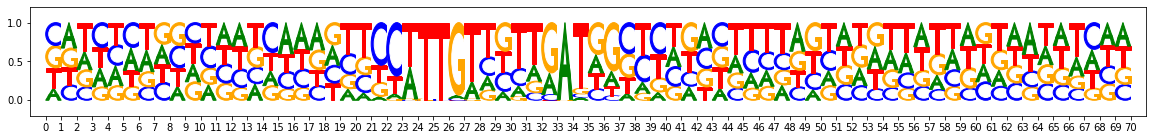

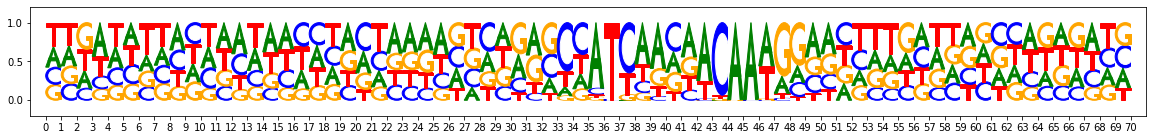

metacluster_0 pattern_23
total seqlets: 88
Task 0 hypothetical scores:


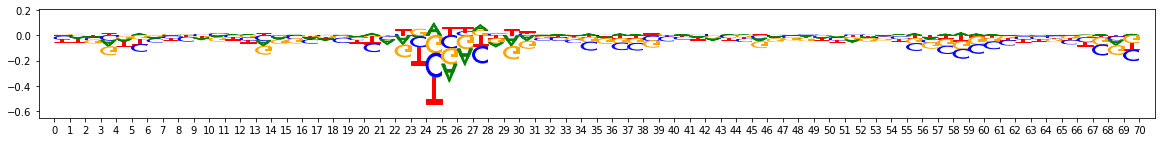

Task 0 actual importance scores:


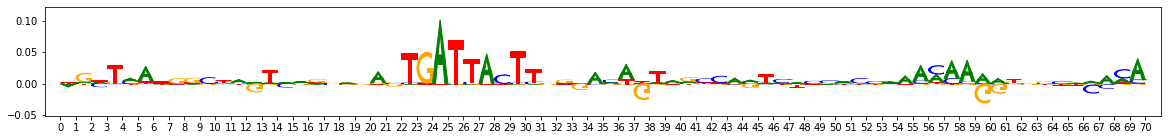

onehot, fwd and rev:


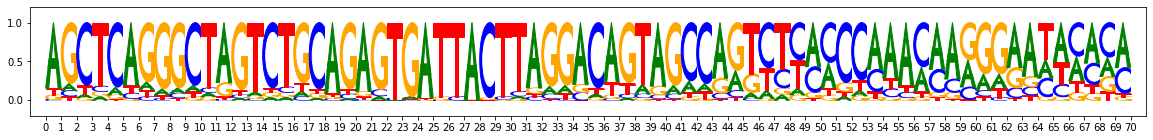

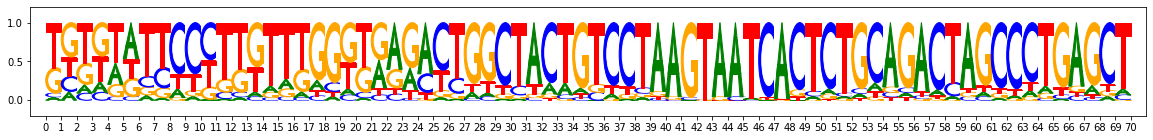

metacluster_0 pattern_24
total seqlets: 84
Task 0 hypothetical scores:


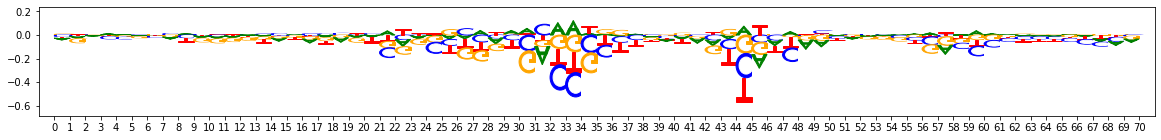

Task 0 actual importance scores:


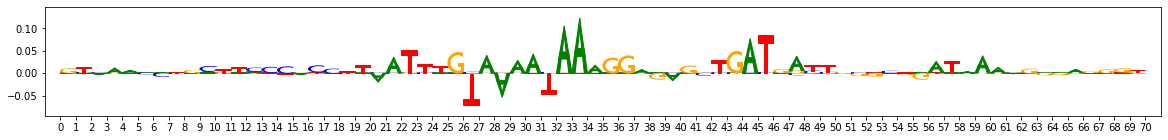

onehot, fwd and rev:


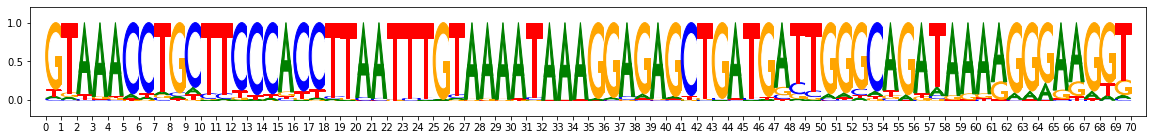

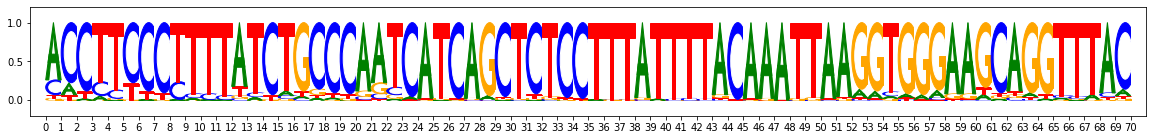

metacluster_0 pattern_25
total seqlets: 87
Task 0 hypothetical scores:


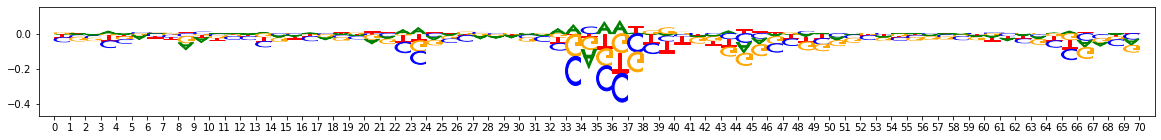

Task 0 actual importance scores:


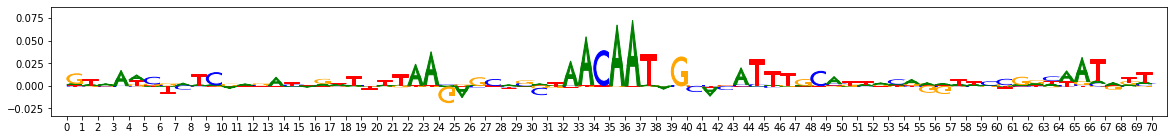

onehot, fwd and rev:


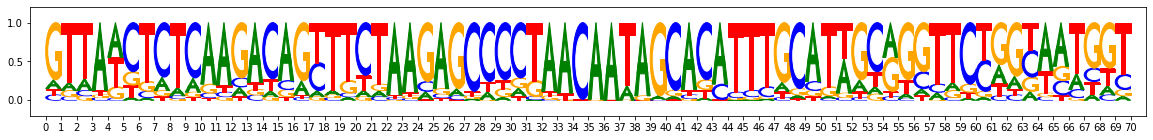

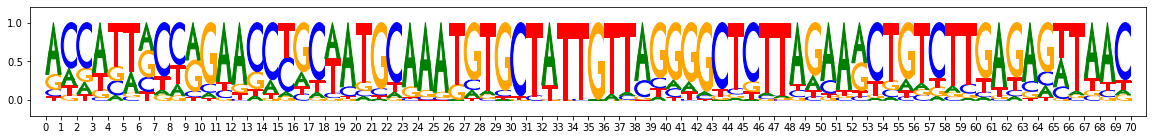

metacluster_0 pattern_26
total seqlets: 91
Task 0 hypothetical scores:


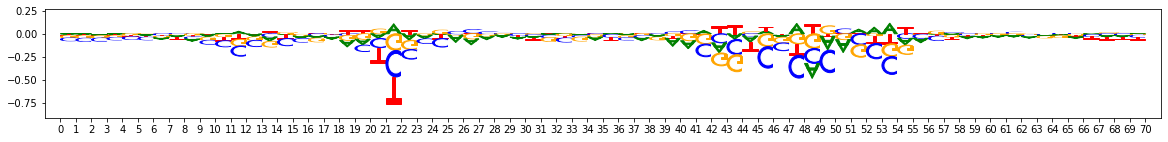

Task 0 actual importance scores:


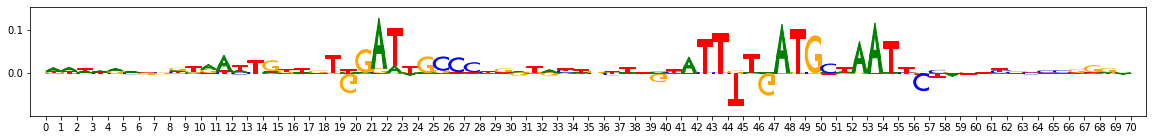

onehot, fwd and rev:


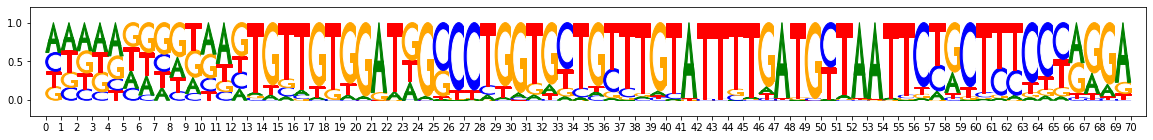

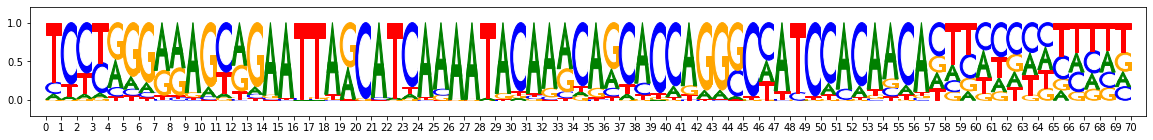

metacluster_0 pattern_27
total seqlets: 63
Task 0 hypothetical scores:


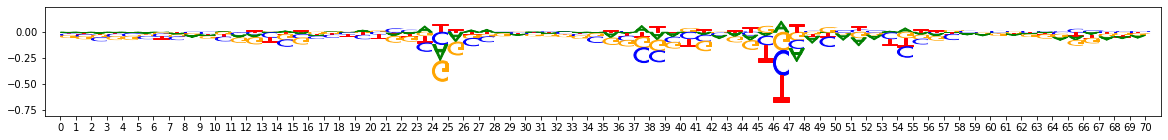

Task 0 actual importance scores:


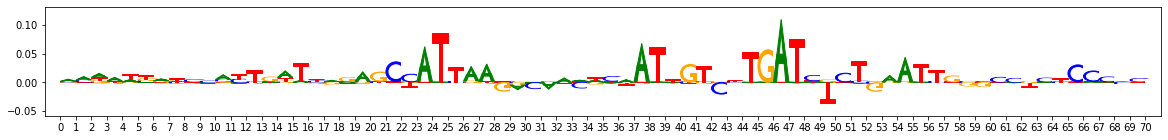

onehot, fwd and rev:


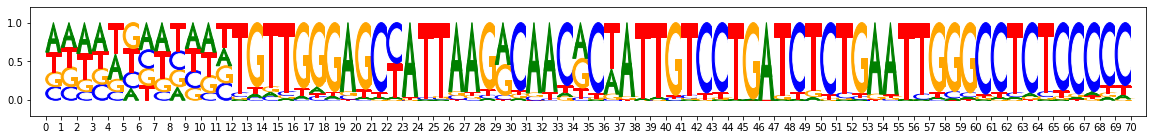

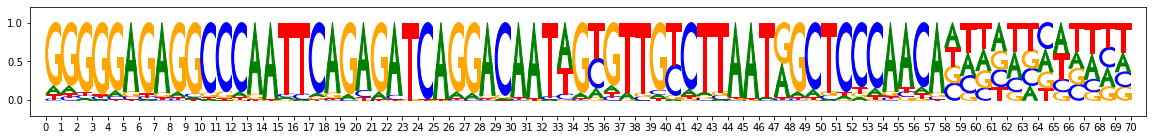

In [11]:
from modisco.visualization import viz_sequence
%matplotlib inline

hdf5_results = h5py.File(file_path,"r")

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(np.array(pattern["sequence"]["fwd"])) 
        viz_sequence.plot_weights(np.array(pattern["sequence"]["rev"])) 
        
hdf5_results.close()